In [20]:
import numpy as np
import pandas as pd
import pcg_skel
from common_setup import project_info, project_paths
from generate_column_cards import baseline_data_filename, preprocess_neuron, extract_baseline_data, card_figure_v2, output_count_bar
from caveclient import CAVEclient
from meshparty import meshwork
import os

import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import dotenv
import card_config

visConfig = card_config.VisualizationConfig()

env_name = 'slanted'
params = dotenv.dotenv_values(f'{env_name}.env')
version = params.get('MAT_VERSION')

client = CAVEclient(project_info.datastack)
client.materialize.version = version

In [21]:
version = 464
bd_filename = baseline_data_filename(f"{project_paths.data}/temp", env_name, version)

cell_type_df, layer_bins, target_df, syn_profile_count_comp_long, syn_profile_comp_count, layerConfig, catConfig = \
    extract_baseline_data(bd_filename)

In [26]:
syn_profile_comp_count.reset_index().to_feather(f'../../notebooks/baseline_comp_v{version}.feather')

In [17]:
soma_df = client.materialize.query_table(project_info.soma_table,
                                         filter_equal_dict={'cell_type': 'neuron'})

column_df = client.materialize.query_table(project_info.slant_table,
                                           filter_in_dict={'classification_system': ['aibs_coarse_inhibitory',
                                                                                     'aibs_coarse_excitatory']})

In [27]:
layer_bins

array([  0.        ,  19.39004082,  38.78008163,  58.17012245,
        77.56016327,  96.95020408, 116.3402449 , 135.73028571,
       155.12032653, 174.51036735, 193.90040816, 213.29044898,
       232.6804898 , 252.07053061, 271.46057143, 290.85061224,
       310.24065306, 329.63069388, 349.02073469, 368.41077551,
       387.80081633, 407.19085714, 426.58089796, 445.97093878,
       465.36097959, 484.75102041, 504.14106122, 523.53110204,
       542.92114286, 562.31118367, 581.70122449, 601.09126531,
       620.48130612, 639.87134694, 659.26138776, 678.65142857,
       698.04146939, 717.4315102 , 736.82155102, 756.21159184,
       775.60163265, 794.99167347, 814.38171429, 833.7717551 ,
       853.16179592, 872.55183673, 891.94187755, 911.33191837,
       930.72195918, 950.112     ])

---

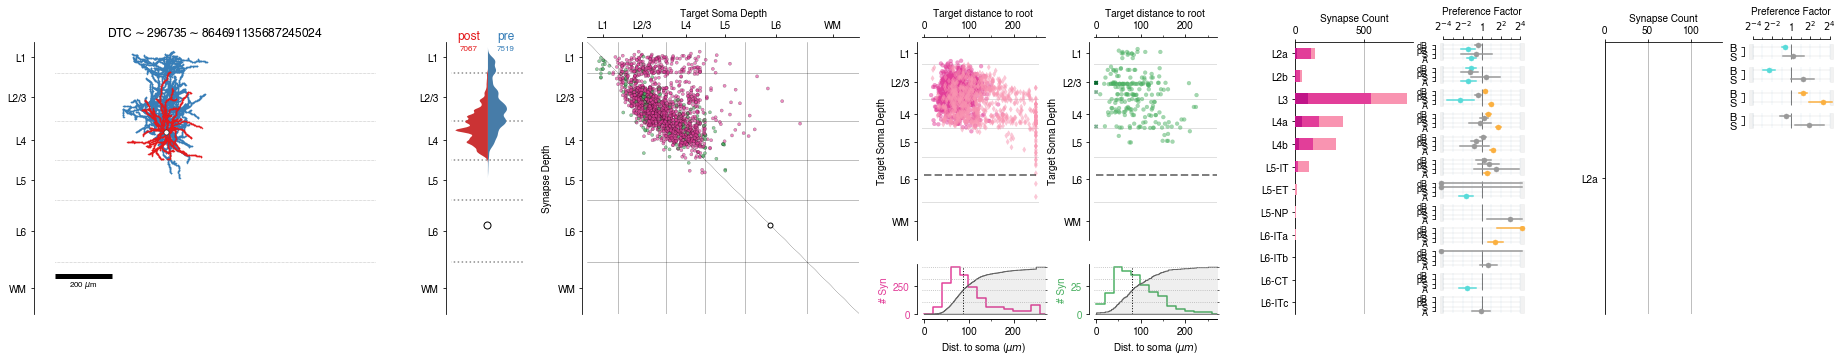

In [18]:
oid = 864691135687245024

nrn, pre_syn_df, soma_depth, nrn_soma_id, nrn_subtype, syn_df_bin_count_long, res_df = preprocess_neuron(oid,
                                                                                                         cell_type_df,
                                                                                                         soma_df,
                                                                                                         layerConfig.layer_bins,
                                                                                                         target_df, 
                                                                                                         syn_profile_count_comp_long, 
                                                                                                         catConfig,
                                                                                                         f'{project_paths.skeletons}/skeleton_files',
                                                                                                         )

title = f'{nrn_subtype}$\sim${nrn_soma_id}$\sim${oid}'
fig = card_figure_v2(nrn, pre_syn_df, soma_depth, syn_df_bin_count_long, res_df, visConfig, layerConfig, catConfig, title=title)

# fig.savefig(f'{nrn_subtype}_id{nrn_soma_id}_{oid}.pdf', bbox_inches='tight')

In [19]:
res_df

,cell_type_comp,odds_ratio,or_lb,or_ub,pvalue,sig
0,L2a_basal,0.767026,0.620054,0.948835,3.645725e-01,False
1,L2a_prox,0.379414,0.228681,0.629501,4.061688e-03,True
2,L2a_soma,0.673170,0.216282,2.095215,9.999999e-01,False
3,L2a_apical,0.471006,0.332703,0.666802,5.396710e-04,True
4,L2b_basal,0.469919,0.327583,0.674099,1.196270e-03,True
5,L2b_prox,0.411669,0.229932,0.737052,7.156345e-02,False
6,L2b_soma,1.326334,0.463442,3.795866,1.000000e+00,False
7,L2b_apical,0.382208,0.229823,0.635631,3.776716e-03,True
8,L3_basal,1.290877,1.154867,1.442906,2.861428e-04,True
9,L3_prox,0.763486,0.620667,0.939170,2.949635e-01,False


In [ ]:
import pdb
pdb.pm()

In [ ]:
import datetime
client.materialize.live_query(project_info.soma_table, filter_equal_dict={'pt_root_id': 864691135303414951}, timestamp=datetime.datetime.now())

In [ ]:
visConfig.e_component_palette

In [ ]:
output_count_bar(
    pre_syn_df.query('valence == "Exc"'),
    hue='comp',
    palette=visConfig.e_component_palette
    )

In [ ]:
pre_syn_df.query('valence == "Exc"')['comp']

In [ ]:
    cell_type="cell_type",
    component="comp",
    cell_type_component="cell_type_comp",

In [ ]:
465/500 * 95.6

In [ ]:
1298.6779 + 88.908/2

In [ ]:
syn_df_bin_count_long['num_syn'].sum()

---
For neurons with skeletons in the usual place

In [ ]:
custom_ct_dir = f'{project_paths.plots}/custom_agg_l5ct_v75'
if not os.path.exists(custom_ct_dir):
    os.makedirs(custom_ct_dir)

In [ ]:
i_oids = column_df.query('classification_system == "aibs_coarse_inhibitory"').sort_values(by='cell_type')['pt_root_id'].values
failed_oids = []
for oid in tqdm.tqdm(i_oids):
    try:
        nrn, pre_syn_df, soma_depth, nrn_soma_id, nrn_subtype, syn_df_bin_count_long, res_df = preprocess_neuron(oid,
                                                                                                                 cell_type_df,
                                                                                                                 soma_df,
                                                                                                                 layerConfig.layer_bins,
                                                                                                                 target_df, 
                                                                                                                 syn_profile_count_comp_long, 
                                                                                                                 catConfig,
                                                                                                                 f'{project_paths.skeletons}/skeleton_files',
                                                                                                                 )

        title = f'{nrn_subtype}$\sim${nrn_soma_id}$\sim${oid}'
        fig = card_figure_v2(nrn, pre_syn_df, soma_depth, syn_df_bin_count_long, res_df, visConfig, layerConfig, catConfig, title=title)
        fig.savefig(f'{custom_ct_dir}/nrn_{nrn_subtype}_{oid}.pdf', bbox_inches='tight')
        plt.close(fig)
    except:
        failed_oids.append(oid)
        continue

---

For neurons where you need to download skeletons with pcg_skel

100%|██████████| 16340/16340 [00:00<00:00, 23772.22it/s]


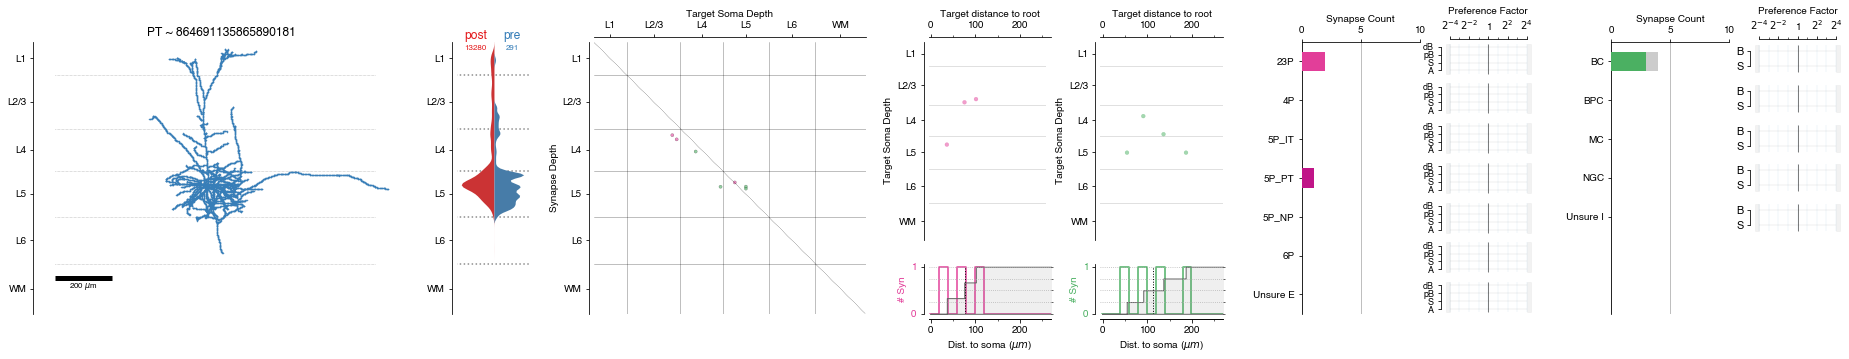

In [20]:
# for _, row in thal_df.iterrows():
oid = 864691135865890181

nrn = pcg_skel.pcg_meshwork(oid,
                        client=client,
                        refine=None,
                        synapses='all',
                        synapse_table=project_info.synapse_table,
                        segmentation_fallback=False,
                        n_parallel=8,
                        )

nrn.anno.add_annotations('is_axon',  np.arange(nrn.mesh.n_vertices), mask=True)

nrn, pre_syn_df, soma_depth, nrn_soma_id, nrn_subtype, syn_df_bin_count_long, res_df = preprocess_neuron(oid,
                                                                                             cell_type_df,
                                                                                             soma_df,
                                                                                             layerConfig.layer_bins,
                                                                                             target_df, 
                                                                                             syn_profile_count_comp_long, 
                                                                                             catConfig,
                                                                                             f'{project_paths.skeletons}/skeleton_files',
                                                                                             soma=False,
                                                                                             nrn=nrn,
                                                                                             )

title = f'PT ~ {oid}' 
fig = card_figure_v2(nrn, pre_syn_df, soma_depth, syn_df_bin_count_long, res_df, visConfig, layerConfig, catConfig, soma=False, title=title)
# fig.savefig(f'{thal_dir}/thal_id{row["id"]}_{oid}.pdf', bbox_inches='tight')
# plt.close(fig)

In [ ]:
thal_df = client.materialize.query_table("allen_v1_column_thalamic")

thal_dir = f'{project_paths.plots}/cards_v2/v{client.materialize.version}_thal'
try:
    os.makedirs(thal_dir)
except:
    pass

In [ ]:
for _, row in thal_df.iterrows():
    oid = row['pt_root_id']

    nrn = pcg_skel.pcg_meshwork(oid,
                            client=client,
                            refine=None,
                            synapses='all',
                            synapse_table=project_info.synapse_table,
                            segmentation_fallback=False,
                            n_parallel=8,
                            )

    nrn.anno.add_annotations('is_axon',  np.arange(nrn.mesh.n_vertices), mask=True)
    
    nrn, pre_syn_df, soma_depth, nrn_soma_id, nrn_subtype, syn_df_bin_count_long, res_df = preprocess_neuron(oid,
                                                                                                 cell_type_df,
                                                                                                 soma_df,
                                                                                                 layerConfig.layer_bins,
                                                                                                 target_df, 
                                                                                                 syn_profile_count_comp_long, 
                                                                                                 catConfig,
                                                                                                 f'{project_paths.skeletons}/skeleton_files',
                                                                                                 soma=False,
                                                                                                 nrn=nrn,
                                                                                                 )
    
    title = f'Thal ~ {row["id"]} ~ {oid}' 
    fig = card_figure_v2(nrn, pre_syn_df, soma_depth, syn_df_bin_count_long, res_df, visConfig, layerConfig, catConfig, soma=False, title=title)
    # fig.savefig(f'{thal_dir}/thal_id{row["id"]}_{oid}.pdf', bbox_inches='tight')
    # plt.close(fig)

---

For neurons where you need to download skeletons with pcg_skel

In [ ]:
pf_df = client.materialize.query_table("proofreading_functional_coreg_v2")

pf_dir = f'{project_paths.plots}/cards_v2/v{client.materialize.version}_proofread_excitatory'
try:
    os.makedirs(pf_dir)
except:
    pass

In [ ]:
pf_df['soma_x'] = pf_df['pt_position'].apply(lambda x: 4*x[0]/1000)

In [ ]:
for _, row in pf_df.sort_values(by='soma_x').iterrows():
    oid = row['pt_root_id']
    soma_pt = row['pt_position']
    nrn = pcg_skel.pcg_meshwork(oid,
                            client=client,
                            refine=None,
                            synapses='all',
                            synapse_table=project_info.synapse_table,
                            segmentation_fallback=False,
                            n_parallel=8,
                            collapse_soma=True,
                            root_point=soma_pt,
                            root_point_resolution=[4,4,40],
                            )



    nrn, pre_syn_df, soma_depth, nrn_soma_id, nrn_subtype, syn_df_bin_count_long, res_df = preprocess_neuron(
                                                                                                 oid,
                                                                                                 cell_type_df,
                                                                                                 pf_df,
                                                                                                 layerConfig.layer_bins,
                                                                                                 target_df, 
                                                                                                 syn_profile_count_comp_long, 
                                                                                                 catConfig,
                                                                                                 f'{project_paths.skeletons}/skeleton_files',
                                                                                                 soma=True,
                                                                                                 nrn=nrn,
                                                                                                 )
    
    title = f'PyC ~ {row["id"]} ~ {oid}' 
    fig = card_figure_v2(nrn, pre_syn_df, soma_depth, syn_df_bin_count_long, res_df, visConfig, layerConfig, catConfig, soma=True, title=title)
    fig.savefig(f'{pf_dir}/pf_pyc_id{row["id"]}_{oid}.pdf', bbox_inches='tight')
    plt.close(fig)

In [ ]:
soma_df.query('pt_root_id == 864691135372415474')

In [ ]:
oid = 864691135372415474
row = soma_df.query('pt_root_id == 864691135372415474').iloc[0]

soma_pt = row['pt_position']
nrn = pcg_skel.pcg_meshwork(oid,
                        client=client,
                        refine=None,
                        synapses='all',
                        synapse_table=project_info.synapse_table,
                        segmentation_fallback=False,
                        n_parallel=8,
                        collapse_soma=True,
                        root_point=soma_pt,
                        root_point_resolution=[4,4,40],
                        )

nrn.anno.add_annotations('is_axon',  np.arange(nrn.mesh.n_vertices), mask=True)

nrn, pre_syn_df, soma_depth, nrn_soma_id, nrn_subtype, syn_df_bin_count_long, res_df = preprocess_neuron(
                                                                                             oid,
                                                                                             cell_type_df,
                                                                                             soma_df,
                                                                                             layerConfig.layer_bins,
                                                                                             target_df, 
                                                                                             syn_profile_count_comp_long, 
                                                                                             catConfig,
                                                                                             f'{project_paths.skeletons}/skeleton_files',
                                                                                             soma=True,
                                                                                             nrn=nrn,
                                                                                             )

title = f'PyC ~ {row["id"]} ~ {oid}' 
fig = card_figure_v2(nrn, pre_syn_df, soma_depth, syn_df_bin_count_long, res_df, visConfig, layerConfig, catConfig, soma=True, title=title)

##  Inhibitory surround neurons

In [ ]:
superbox_i_df = pd.read_feather(f'{project_paths.data}/temp/superbox_i_v{client.materialize.version}.feather')

In [ ]:
sb_oids = superbox_i_df.query('num_soma == 1')['pt_root_id'].values

In [ ]:
supercol_dir = f'{project_paths.plots}/cards_v2/v{client.materialize.version}_supercolumn'
try:
    os.makedirs(supercol_dir)
except:
    pass

In [ ]:
for _, row in tqdm.tqdm(superbox_i_df.query('num_soma==1').sort_values(by='soma_y_vx').iterrows()):
    oid = row['pt_root_id']
    soma_pt = row['pt_position']
    nrn = pcg_skel.pcg_meshwork(oid,
                            client=client,
                            refine=None,
                            synapses='all',
                            synapse_table=project_info.synapse_table,
                            segmentation_fallback=False,
                            n_parallel=8,
                            collapse_soma=True,
                            root_point=soma_pt,
                            root_point_resolution=[4,4,40],
                            )
    
    if len(nrn.anno.pre_syn) > 0 and len(nrn.anno.post_syn) > 0:
        is_axon, split_quality = meshwork.algorithms.split_axon_by_synapses(
                nrn, nrn.anno.pre_syn.mesh_index, nrn.anno.post_syn.mesh_index
        )
    else:
        split_quality = -1
    if split_quality < 0.7:    
        is_axon = np.full(nrn.mesh.n_vertices, False)
    nrn.anno.add_annotations("is_axon", np.flatnonzero(is_axon), mask=True)
    
    nrn.save_meshwork(f'{project_paths.skeletons}/skeleton_files/{oid}.h5', overwrite=True)
    nrn, pre_syn_df, soma_depth, nrn_soma_id, nrn_subtype, syn_df_bin_count_long, res_df = preprocess_neuron(
                                                                                                 oid,
                                                                                                 cell_type_df,
                                                                                                 superbox_i_df,
                                                                                                 layerConfig.layer_bins,
                                                                                                 target_df, 
                                                                                                 syn_profile_count_comp_long, 
                                                                                                 catConfig,
                                                                                                 f'{project_paths.skeletons}/skeleton_files',
                                                                                                 soma=True,
                                                                                                 nrn=nrn,
                                                                                                 )

    title = f'IN ~ {row["id"]} ~ {oid}' 
    fig = card_figure_v2(nrn, pre_syn_df, soma_depth, syn_df_bin_count_long, res_df, visConfig, layerConfig, catConfig, soma=True, title=title)
    fig.savefig(f'{supercol_dir}/nrn_depth{int(soma_depth)}_id{row["id"]}_{oid}.pdf', bbox_inches='tight')
    plt.close(fig)